# Importing Libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
%matplotlib inline

sns.set_style('darkgrid')
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 10)

# Loading the Dataset

In [2]:
missing_values = ['na','NaN']
df=pd.read_csv("Patient Survival Detection Data\Dataset.csv",na_values = missing_values)

In [3]:
df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,1

In [4]:
# plt.figure(figsize=(22,17))
# sns.set(font_scale=0.8)
# sns.heatmap(df.corr(), annot=True, cmap=plt.cm.CMRmap_r)

### Handling Missing Values

In [5]:
# import missingno as msno

# msno.bar(df)
# msno.heatmap(df)
# msno.dendrogram(df)
# msno.matrix(df)

In [6]:
 #To find out the percentage of the data in a column is null
      # if percentage is greater than threshold drop the column
      # else drop the rows
        
def remove_null_col_threshold( df , threshold = 20):
    '''This is a doc string
    '''
    pd.set_option("display.max_rows", None, "display.max_columns", None)
    c = df.isnull().sum()
    total_null = c / len(df)*100
    print('NULL data from each column     (out of 100%)\n')
    print(total_null)
    print('\n>>>>>>  Threshold : ',threshold,'  <<<<<<<<<<\n\n')
    print('\n>>>>>>  Dropped Columns :- \n\n')
    print(total_null[total_null > threshold])
    to_be_removed_col = total_null[total_null > threshold]
    to_be_removed_col.keys()
    df_clean = df.copy()
    df_clean = df_clean.drop(to_be_removed_col.keys() , axis=1)
    pd.set_option("display.max_rows", 10, "display.max_columns", 100)
    return df_clean

In [7]:
df = remove_null_col_threshold(df, 40)

NULL data from each column     (out of 100%)

encounter_id                      0.000000
patient_id                        0.000000
hospital_id                       0.000000
hospital_death                    0.000000
age                               4.610033
bmi                               3.738837
elective_surgery                  0.000000
ethnicity                         1.521049
gender                            0.027259
height                            1.454538
hospital_admit_source            23.343474
icu_admit_source                  0.122120
icu_id                            0.000000
icu_stay_type                     0.000000
icu_type                          0.000000
pre_icu_los_days                  0.000000
readmission_status                0.000000
weight                            2.965774
albumin_apache                   59.292576
apache_2_diagnosis                1.812175
apache_3j_diagnosis               1.200484
apache_post_operative             0.000000
arf_apac

In [8]:
df.isna().sum()[df.isna().sum() != 0]

age                            4228
bmi                            3429
ethnicity                      1395
gender                           25
height                         1334
                               ... 
leukemia                        715
lymphoma                        715
solid_tumor_with_metastasis     715
apache_3j_bodysystem           1662
apache_2_bodysystem            1662
Length: 101, dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.isna().sum()[df.isna().sum() != 0]

Series([], dtype: int64)

In [11]:
df.shape

(27795, 112)

In [12]:
#  7   ethnicity                      90318 non-null  object 
#  8   gender                         91688 non-null  object 
#  10  hospital_admit_source          70304 non-null  object 
#  11  icu_admit_source               91601 non-null  object 
#  13  icu_stay_type                  91713 non-null  object 
#  14  icu_type                       91713 non-null  object
#  85  apache_3j_bodysystem           90051 non-null  object 
#  86  apache_2_bodysystem            90051 non-null  object 
df['ethnicity'].value_counts()
df['gender'].value_counts()
df['hospital_admit_source'].unique()
df['icu_admit_source'].unique() #Contains nan



array(['Floor', 'Accident & Emergency', 'Operating Room / Recovery',
       'Other Hospital', 'Other ICU'], dtype=object)

## Checking for the Correlated Variables
### Threshold : 90% i.e. 0.90

In [13]:
threshold = 0.90
corr_n = df.corr()
corr = ((corr_n>threshold)==True)

for i in corr.columns:
    corr_n[i][i]= 0
    corr[i][i] = False    

#Number of Non-Zero Element
np.count_nonzero(corr)

62

In [14]:
remove_col_i = []
remove_col_j = []
for i in corr.columns:
    for j in corr.columns:
        if corr[i][j] == True:
            print(i,'~',j ,'\t\t', corr_n[i][j])
            remove_col_i.append(i)
            remove_col_j.append(j)
            corr[j][i]=False    #For removing the Twin Diagonal Elements

elective_surgery ~ apache_post_operative 		 0.9206975192645646
bun_apache ~ d1_bun_max 		 0.9850695682510876
bun_apache ~ d1_bun_min 		 0.9671639257691029
creatinine_apache ~ d1_creatinine_max 		 0.9950645611709149
creatinine_apache ~ d1_creatinine_min 		 0.9701173919531227
glucose_apache ~ d1_glucose_max 		 0.9264940502165614
hematocrit_apache ~ d1_hemaglobin_min 		 0.943661584514574
hematocrit_apache ~ d1_hematocrit_max 		 0.913058729293828
hematocrit_apache ~ d1_hematocrit_min 		 0.9706860238701239
sodium_apache ~ d1_sodium_min 		 0.9237338127391974
wbc_apache ~ d1_wbc_max 		 0.9716276765661636
wbc_apache ~ d1_wbc_min 		 0.9337392851398509
d1_diasbp_max ~ d1_diasbp_noninvasive_max 		 0.9987364714898634
d1_diasbp_min ~ d1_diasbp_noninvasive_min 		 0.9984486666826136
d1_mbp_max ~ d1_mbp_noninvasive_max 		 0.9819222771400679
d1_mbp_min ~ d1_mbp_noninvasive_min 		 0.9954867055410783
d1_sysbp_max ~ d1_sysbp_noninvasive_max 		 0.9979341248646483
d1_sysbp_min ~ d1_sysbp_noninvasive_min 		 

In [15]:
#getting all the unique values and creating set from list
remove_col_j = set(remove_col_j)

### Intersection of both i and j must be removed from the Data

In [16]:
drop_col = list(remove_col_j)
drop_col

['d1_diasbp_noninvasive_min',
 'd1_platelets_min',
 'd1_creatinine_min',
 'apache_post_operative',
 'd1_mbp_noninvasive_min',
 'h1_diasbp_noninvasive_max',
 'h1_diasbp_noninvasive_min',
 'd1_creatinine_max',
 'h1_sysbp_noninvasive_max',
 'd1_hematocrit_min',
 'd1_hematocrit_max',
 'h1_mbp_noninvasive_max',
 'd1_sysbp_noninvasive_max',
 'd1_diasbp_noninvasive_max',
 'd1_wbc_min',
 'd1_hemaglobin_min',
 'd1_bun_max',
 'd1_sysbp_noninvasive_min',
 'h1_sysbp_noninvasive_min',
 'd1_glucose_max',
 'h1_mbp_noninvasive_min',
 'd1_bun_min',
 'd1_wbc_max',
 'd1_sodium_min',
 'd1_mbp_noninvasive_max']

In [17]:
df.drop(labels=drop_col , axis=1 , inplace=True)

In [18]:
df.shape

(27795, 87)

## Drop all the IDs as they dont contain any information

In [19]:
df = df[df.columns.drop(list(df.filter(regex='_id')))]

In [20]:
df.sample()

,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_temp_max,h1_temp_min,d1_calcium_max,d1_calcium_min,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_platelets_max,d1_potassium_max,d1_potassium_min,d1_sodium_max,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
43853,0,64.0,42.969395,0,Caucasian,F,167.6,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,0.144444,0,120.7,113.0,501.05,0.0,26.0,1.0,4.0,6.0,0.0,5.0,104.0,96.0,31.4,0.0,47.0,26.0,140.0,37.2,0.0,15.9,78.0,35.0,88.0,76.0,92.0,51.0,27.0,16.0,100.0,86.0,146.0,89.0,37.6,37.2,76.0,52.0,87.0,79.0,65.0,47.0,27.0,17.0,100.0,100.0,118.0,89.0,37.6,37.6,7.8,7.8,104.0,27.0,27.0,10.1,221.0,4.2,4.2,140.0,0.04,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular


# Test-Train Data Split

## Encoding and Scaling the Test and Train Dataset

In [21]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df = df.apply(label_encoder.fit_transform)

In [22]:
df

,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_temp_max,h1_temp_min,d1_calcium_max,d1_calcium_min,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_platelets_max,d1_potassium_max,d1_potassium_min,d1_sodium_max,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0,52,3416,0,2,1,212,4,1,0,2,853,0,777,11,102,0,83,285,2,5,0,3,132,82,112,0,0,40,32,134,0,1166,22,24,61,72,29,24,20,10,21,74,41,32,151,124,31,41,73,72,37,53,16,18,44,59,56,62,207,152,23,19,76,25,23,21,206,19,18,17,11,6,0,0,1,0,0,0,0,0,9,0
1,0,61,7442,0,2,0,90,4,1,0,5,1318,0,672,7,30,0,17,37,0,2,0,0,109,84,207,0,6,35,61,38,1,1027,49,18,60,72,60,16,18,12,21,70,69,26,14,43,24,26,68,64,36,25,21,28,39,55,20,18,75,90,24,25,95,89,103,45,520,30,33,37,48,30,0,0,1,0,0,0,0,0,8,6
5,0,51,7579,0,2,1,257,2,0,0,5,76,0,1474,36,80,0,36,71,3,5,0,4,120,77,280,0,82,39,40,78,0,850,54,48,55,83,67,58,18,10,18,91,83,66,31,97,52,67,37,47,62,79,2,12,41,82,68,90,97,112,26,33,92,89,109,88,132,17,29,18,6,3,0,0,1,0,0,0,0,0,7,4
17,0,30,6084,0,3,1,137,3,0,0,2,75,0,740,7,30,0,43,134,0,3,0,0,107,78,280,1,65,38,27,74,1,730,43,48,40,64,53,54,8,9,21,88,79,61,43,90,52,41,48,44,55,56,11,9,43,80,94,62,92,106,23,30,110,89,109,82,220,44,60,9,12,7,0,0,0,0,0,0,0,0,8,6
23,0,71,2834,0,2,1,212,4,1,0,4,3632,0,706,11,100,0,36,120,2,5,0,0,69,63,127,0,85,35,62,70,1,750,42,52,58,74,63,68,22,16,21,90,89,88,31,54,34,43,70,56,53,58,26,28,43,75,84,76,103,90,15,22,54,79,103,29,246,6,15,38,32,15,0,0,0,0,0,0,0,0,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91675,0,12,16992,0,0,0,0,3,0,0,5,235,0,1724,5,50,0,7,41,3,5,0,4,45,106,168,0,22,43,43,90,0,649,50,33,84,109,41,39,24,8,21,64,43,58,70,107,20,35,93,73,13,30,20,13,44,81,39,61,110,126,24,31,51,45,76,42,290,30,47,21,3,2,0,0,0,0,0,0,0,0,8,6
91677,0,16,11279,1,2,0,90,8,2,0,5,88,0,1037,35,282,0,0,41,2,5,0,4,75,60,168,0,23,3,43,76,0,1100,50,25,61,58,40,24,19,7,21,91,49,24,43,93,48,63,39,34,44,61,12,15,41,77,46,68,87,102,28,35,78,79,103,43,295,34,50,21,2,1,0,0,0,0,0,0,0,0,7,4
91698,0,31,16551,1,2,1,267,3,2,0,5,123,0,2446,39,254,0,17,24,3,5,0,1,92,101,248,0,26,6,32,76,0,1147,37,44,79,93,31,44,7,8,21,93,29,46,70,93,33,48,54,57,29,46,5,9,43,82,29,51,87,102,22,29,95,62,93,70,229,30,47,13,2,1,0,0,0,0,0,0,0,0,1,1
91706,0,38,1376,0,4,1,199,2,0,0,5,112,0,474,8,9,0,43,69,3,5,0,4,52,25,248,0,22,11,49,78,0,475,56,41,20,55,51,40,9,12,21,90,79,49,21,97,65,74,13,19,62,76,9,13,44,83,94,90,92,106,29,34,58,111,103,81,184,30,46,28,2,1,0,0,0,0,0,0,0,0,0,0


In [23]:
# separating target and predictor variables
data_y = df['hospital_death']
data_x = df.drop('hospital_death',axis=1)

In [24]:
# splitting the dataset into train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y,  test_size=0.2, shuffle = True, random_state = 8)

In [25]:
df.shape

(27795, 83)

In [26]:
X_train.shape, X_test.shape

((22236, 82), (5559, 82))

In [27]:
y_train.shape, y_test.shape

((22236,), (5559,))

In [28]:
data_y.value_counts()

0    25259
1     2536
Name: hospital_death, dtype: int64

In [29]:
df.sample(10)

,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_temp_max,h1_temp_min,d1_calcium_max,d1_calcium_min,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_platelets_max,d1_potassium_max,d1_potassium_min,d1_sodium_max,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
88595,0,59,0,0,2,0,73,3,0,0,4,94,0,0,38,34,0,8,22,0,0,0,0,149,85,129,0,14,11,43,66,1,997,34,24,55,66,34,25,9,6,21,93,79,34,61,80,34,32,52,55,38,35,4,13,44,85,62,53,69,83,11,18,95,36,67,26,276,8,11,21,25,13,0,0,0,0,0,0,0,0,8,6
83449,0,71,3632,0,2,0,24,3,0,0,5,399,0,179,22,59,0,63,59,3,5,0,4,102,94,43,0,101,56,51,74,0,531,92,38,68,64,89,61,35,13,20,91,123,78,31,80,53,43,37,40,98,85,33,25,42,77,138,137,103,90,26,33,105,54,84,16,127,3,11,28,11,6,0,0,0,0,0,0,0,0,1,1
58058,0,63,9758,1,2,1,149,13,2,0,6,857,0,1159,35,282,0,54,127,3,5,0,4,76,73,108,0,148,8,49,58,0,1086,59,15,55,79,50,12,18,9,21,94,39,28,39,68,68,17,38,43,61,20,5,12,44,85,54,40,57,71,14,21,79,71,100,26,86,27,46,25,8,3,0,0,1,0,0,0,0,0,7,4
46250,0,64,8183,1,2,0,121,8,2,0,0,615,0,863,24,224,0,82,196,3,5,0,4,156,57,112,0,6,28,43,76,1,1298,9,27,33,62,2,32,10,12,21,100,30,29,48,85,12,27,45,55,21,38,4,14,44,85,48,70,126,140,25,22,57,79,59,30,129,46,50,28,4,3,0,0,0,0,0,0,0,0,0,0
39542,0,64,5762,1,5,1,164,8,2,0,2,3554,0,841,43,195,0,42,141,0,0,0,0,110,64,125,0,16,39,30,38,1,860,19,49,38,76,14,50,16,12,21,93,10,51,70,43,22,28,48,54,28,30,2,12,44,85,32,31,37,45,22,29,85,45,76,46,82,43,33,18,8,4,0,0,0,0,0,0,0,0,0,9
29250,0,52,7499,0,1,0,60,3,0,0,4,373,0,563,9,4,0,36,86,3,5,0,4,179,87,256,0,59,65,38,58,0,591,44,52,51,68,63,72,31,10,20,91,91,87,21,68,40,55,63,63,48,65,10,20,42,83,71,93,57,71,23,30,88,126,125,70,198,5,6,17,5,3,0,0,0,0,0,0,0,0,0,0
31505,0,47,5553,0,5,1,201,3,0,0,1,133,0,956,10,8,0,42,102,3,5,0,4,144,24,228,0,95,6,51,66,0,830,62,50,35,58,67,55,5,10,18,93,101,81,39,80,71,75,47,31,78,76,8,10,41,78,116,114,110,106,23,30,144,62,93,70,142,17,39,28,4,2,0,0,0,0,0,0,0,0,0,0
36317,0,37,9961,1,2,1,181,8,2,0,0,3143,0,1310,43,195,0,43,111,2,5,0,0,133,114,128,1,5,43,32,74,1,1156,22,33,67,85,19,36,24,19,20,92,27,39,76,107,36,48,53,55,39,51,17,12,43,80,62,70,92,102,24,31,65,71,100,41,296,43,43,13,3,3,0,0,0,0,0,0,0,0,0,9
17462,0,27,11646,0,3,0,58,3,0,0,5,218,0,924,40,172,0,66,318,3,5,0,4,86,73,149,0,17,10,51,76,1,1126,53,12,50,74,42,15,8,11,20,94,22,22,53,93,27,42,62,72,22,39,9,19,38,79,19,41,132,145,14,21,89,31,59,39,124,30,47,28,4,3,0,0,0,0,0,0,0,0,2,5
85422,1,57,13542,0,2,0,122,2,0,0,4,80,0,1462,12,1,0,114,208,0,0,0,0,238,55,186,0,95,27,57,66,1,1156,48,2,33,78,39,11,13,8,20,75,56,43,65,80,22,21,45,45,28,30,4,12,43,60,62,51,69,83,14,21,240,137,132,33,114,39,56,32,66,48,0,0,1,0,0,0,0,0,0,0


In [30]:
from sklearn.preprocessing import MinMaxScaler
# creating an instance for MinMaxScaler
scaler = MinMaxScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


In [31]:
# storing the normalized data into a new dataframe
X_train_new = pd.DataFrame(X_train_std, columns= X_train.columns)
X_test_new = pd.DataFrame(X_test_std, columns= X_test.columns)

In [32]:
X_train.sample(5)

,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_temp_max,h1_temp_min,d1_calcium_max,d1_calcium_min,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_platelets_max,d1_potassium_max,d1_potassium_min,d1_sodium_max,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
63649,61,9687,0,2,0,90,3,0,0,5,235,0,865,11,96,0,161,434,1,5,0,3,179,104,68,0,4,29,16,68,0,1427,45,17,72,67,34,23,14,13,21,93,25,42,34,83,54,33,46,52,45,33,10,16,42,78,40,50,107,123,15,22,136,12,8,10,541,62,43,13,26,14,0,0,0,0,0,0,0,0,9,0
26565,63,4501,0,3,1,168,4,1,0,5,1831,0,722,3,28,0,119,199,2,5,0,3,178,97,57,0,15,39,57,78,1,581,37,18,62,83,39,14,17,18,21,91,70,21,39,97,26,32,54,56,32,36,19,26,43,82,64,62,114,129,14,20,132,45,59,7,82,17,33,35,43,25,0,0,0,0,0,0,0,0,8,6
25137,40,8773,1,5,0,181,3,2,0,5,1063,0,1193,30,241,0,43,69,1,4,0,0,191,55,117,0,0,29,51,60,1,2125,52,16,37,65,49,18,14,15,21,53,75,39,13,68,30,7,43,44,24,8,18,26,42,52,90,27,59,74,11,7,101,45,59,30,268,14,33,35,9,6,0,0,0,0,1,0,0,0,1,1
27513,38,3494,0,5,1,149,3,0,0,5,499,0,565,39,55,0,131,937,3,5,0,4,62,16,28,0,12,3,37,70,0,237,43,33,50,46,42,32,5,7,21,96,68,39,31,71,15,24,9,10,11,22,2,9,44,81,9,29,75,90,10,15,39,2,10,2,72,19,39,18,9,5,0,1,1,1,0,0,0,0,1,1
90752,48,12814,0,2,1,137,3,0,0,5,295,0,1431,9,4,0,83,178,3,5,0,4,52,7,144,0,13,56,54,58,0,221,52,10,61,37,42,6,48,9,21,73,18,15,21,68,40,43,48,41,40,44,11,13,42,76,29,33,57,71,19,26,58,137,132,27,151,0,3,31,9,5,0,0,0,0,0,0,0,0,0,0


In [33]:
X_train_new.shape[-1]

82

### Model 2:  Deep Learning Model with 
- Dropout layers , 
- Dealing with Class-Imbalance 
- Keras Tuner

#### Points
- Class Imbalance is a major issue when dealing with classification problem since one class dominates the other class with a large number.
- Keras can be used to deal with class imbalance problem by specifying the weights to the classes.
- Class with lesser number of samples can be given more weightage as compared to dominant class.



- Using Keras Tuner hyperparamter tuning can be done in deep learning models as well.
- In this case it is always advisable to focus on loss values of both the training and validation data since a model is considered more stable when the loss decreases with each epoch

In [34]:
model = Sequential()
# adding first layer and using relu as an activation function
model.add(Dense(128, input_shape=(X_train_new.shape[-1],), activation='relu'))
model.add(Dropout(0.5))
# adding second layer to the sequential model
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
# Adding third layer 
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
# Adding third layer 
model.add(Dense(16, activation='relu'))
# adding output layer to the model using sigmoid activation function which seems to be ideal for binary classification problem
model.add(Dense(1, activation='sigmoid'))

# printing the model summary just to get an idea about how many paramters are required for the current model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               10624     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                5

In [35]:
# metrics that might be useful for present project
metrics = [
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
    keras.metrics.AUC(curve='ROC')
]


### Compiling the model
### choosing an appropirate optimiser and loss function
model.compile(optimizer=keras.optimizers.Adam(0.01),
              loss='binary_crossentropy',
              metrics=metrics)

In [36]:
callbacks = [keras.callbacks.ModelCheckpoint("patient_model_at_epoch_{epoch}.h5")]
# specifying the weights for the two classes with class 1 given higher weight value than class 0 and then using this class_weight in training the model
class_weight = {0: 0.5, 1: 5}


In [37]:
### Training the model
epochs = 40
batch_size = 32
history = model.fit(X_train_new.values,y_train, 
                    validation_data = (X_test_new.values, y_test), 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=callbacks, 
                    class_weight=class_weight)

Epoch 1/40
695/695 [==============================] - 2s 3ms/step - loss: 0.5789 - precision: 0.1472 - recall: 0.6859 - auc: 0.7054 - val_loss: 0.4667 - val_precision: 0.3879 - val_recall: 0.5861 - val_auc: 0.8580
Epoch 2/40
695/695 [==============================] - 2s 3ms/step - loss: 0.5177 - precision: 0.2400 - recall: 0.6529 - auc: 0.7851 - val_loss: 0.4614 - val_precision: 0.3801 - val_recall: 0.6059 - val_auc: 0.8512
Epoch 3/40
695/695 [==============================] - 2s 3ms/step - loss: 0.5130 - precision: 0.2450 - recall: 0.6686 - auc: 0.7813 - val_loss: 0.6325 - val_precision: 0.1582 - val_recall: 0.9525 - val_auc: 0.8723
Epoch 4/40
695/695 [==============================] - 2s 3ms/step - loss: 0.5034 - precision: 0.2529 - recall: 0.6888 - auc: 0.7839 - val_loss: 0.5082 - val_precision: 0.2168 - val_recall: 0.8752 - val_auc: 0.8683
Epoch 5/40
695/695 [==============================] - 2s 3ms/step - loss: 0.5124 - precision: 0.2356 - recall: 0.6805 - auc: 0.7756 - val_loss: 

695/695 [==============================] - 2s 3ms/step - loss: 0.5029 - precision: 0.3270 - recall: 0.6056 - auc: 0.7716 - val_loss: 0.5734 - val_precision: 0.3078 - val_recall: 0.7089 - val_auc: 0.8266
Epoch 40/40
695/695 [==============================] - 2s 3ms/step - loss: 0.5041 - precision: 0.3268 - recall: 0.6100 - auc: 0.7575 - val_loss: 0.5052 - val_precision: 0.4448 - val_recall: 0.5426 - val_auc: 0.7894


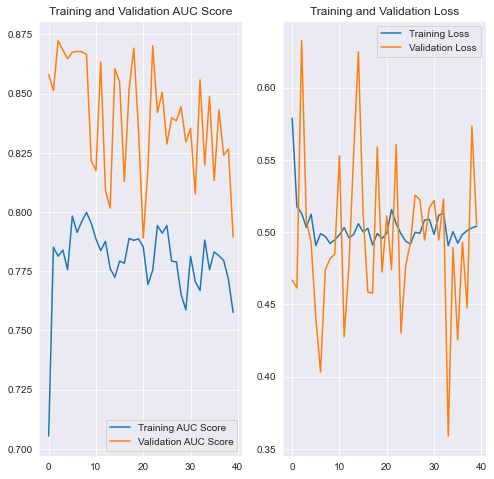

In [39]:
acc = history.history['auc']
val_acc = history.history['val_auc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training AUC Score')
plt.plot(epochs_range, val_acc, label='Validation AUC Score')
plt.legend(loc='lower right')
plt.title('Training and Validation AUC Score')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Model with Keras Tuner

In [43]:
import keras_tuner as kt

In [48]:
def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=[82]))
  
  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(keras.layers.Dense(1, activation='sigmoid'))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  metrics = [
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
    keras.metrics.AUC(curve='ROC')]

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.BinaryCrossentropy(),
                metrics=metrics)

  return model

In [63]:
tuner = kt.RandomSearch(
    model_builder,
    objective='val_loss',
    max_trials=15,
    directory=os.path.normpath("C:/"))

INFO:tensorflow:Reloading Oracle from existing project C:\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from C:\untitled_project\tuner0.json


In [64]:
 # using early stopping to stop training the model when optimal value of recall and loss values are achieved.
 stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_recall', patience=5)

In [65]:
tuner.search(X_train_new.values, y_train, epochs=30, validation_data = (X_test_new.values, y_test), callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 15 Complete [00h 00m 05s]
val_loss: 0.21223239600658417

Best val_loss So Far: 0.20742167532444
Total elapsed time: 00h 01m 00s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 416 and the optimal learning rate for the optimizer
is 0.001.



## Preparing a model with tuned param.

- Using Keras Tuner hyperparamter tuning can be done in deep learning models as well.
- In this case it is always advisable to focus on loss values of both the training and validation data since a model is considered more stable when the loss decreases with each epoch


In [68]:
model = Sequential()
model.add(Dense(416, input_shape=(X_train_new.shape[-1],), activation='relu'))
model.add(Dense(416, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [69]:
metrics = [
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
    keras.metrics.AUC(curve='ROC')
]


### Compiling the model
### choosing an appropirate optimiser and loss function
model.compile(optimizer=keras.optimizers.Adam(0.0001),
              loss='binary_crossentropy',
              metrics=metrics)

In [70]:
### Training the model
epochs = 20
batch_size = 32
history = model.fit(X_train_new.values,y_train, validation_data = (X_test_new.values, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/20
695/695 [==============================] - 1s 1ms/step - loss: 0.2328 - precision: 0.6576 - recall: 0.1910 - auc_1: 0.8394 - val_loss: 0.2146 - val_precision: 0.5935 - val_recall: 0.3267 - val_auc_1: 0.8716
Epoch 2/20
695/695 [==============================] - 1s 806us/step - loss: 0.2130 - precision: 0.6674 - recall: 0.3003 - auc_1: 0.8718 - val_loss: 0.2118 - val_precision: 0.6632 - val_recall: 0.2535 - val_auc_1: 0.8760
Epoch 3/20
695/695 [==============================] - 1s 802us/step - loss: 0.2084 - precision: 0.6631 - recall: 0.3072 - auc_1: 0.8779 - val_loss: 0.2100 - val_precision: 0.6375 - val_recall: 0.3168 - val_auc_1: 0.8786
Epoch 4/20
695/695 [==============================] - 1s 799us/step - loss: 0.2057 - precision: 0.6823 - recall: 0.3215 - auc_1: 0.8815 - val_loss: 0.2106 - val_precision: 0.6984 - val_recall: 0.2614 - val_auc_1: 0.8780
Epoch 5/20
695/695 [==============================] - 1s 816us/step - loss: 0.2039 - precision: 0.6724 - recall: 0.3255 - 

In [72]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 416)               34528     
_________________________________________________________________
dense_4 (Dense)              (None, 416)               173472    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 417       
Total params: 208,417
Trainable params: 208,417
Non-trainable params: 0
_________________________________________________________________


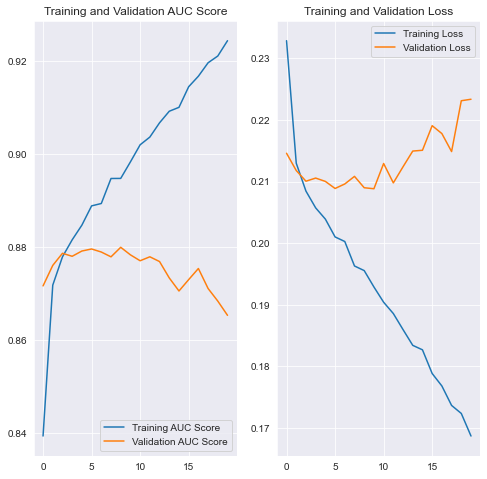

In [71]:
acc = history.history['auc_1']
val_acc = history.history['val_auc_1']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training AUC Score')
plt.plot(epochs_range, val_acc, label='Validation AUC Score')
plt.legend(loc='lower right')
plt.title('Training and Validation AUC Score')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Conclusion from the Final Model:
- The validation loss has decreased significantly.
- The precision and recall metrics are improved to some extent.
- The model is more generalized
- learning rate and number of units used are not random but calculated using proper methods. 

# ------------------------------------------------------ END  ---------------------------------------------

### Log Result Dump

## Model 1
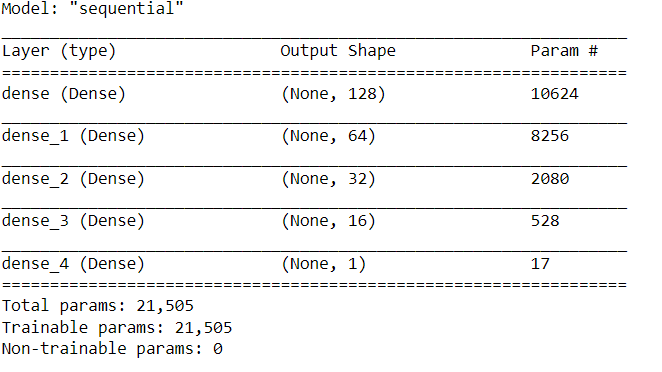
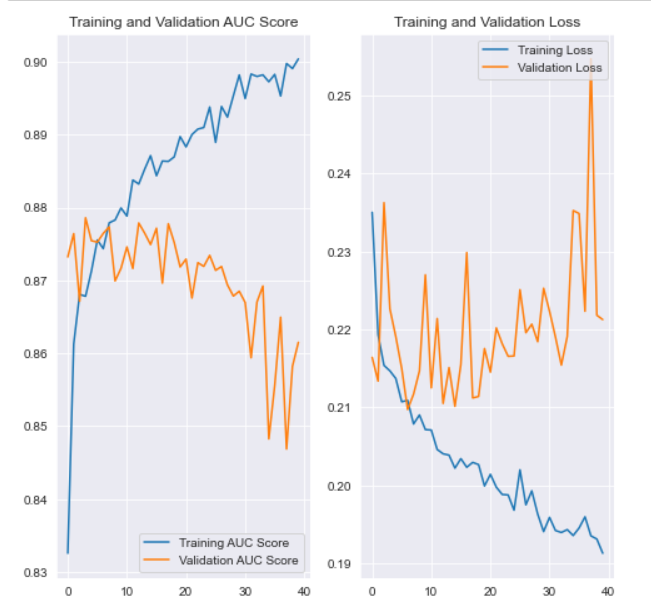

#### Conclusion from Model 1:
- There is a large fluctuation in the validation loss using this model.
- Validation Loss is diverging from the Training Loss which means
- The recall evaluation metric is also not giving very good results
- Overfitting due to differences in the training / validation data
- Skewed classes (and differences in the training / validation data)
#### Try Adding DropOut

## Model 2
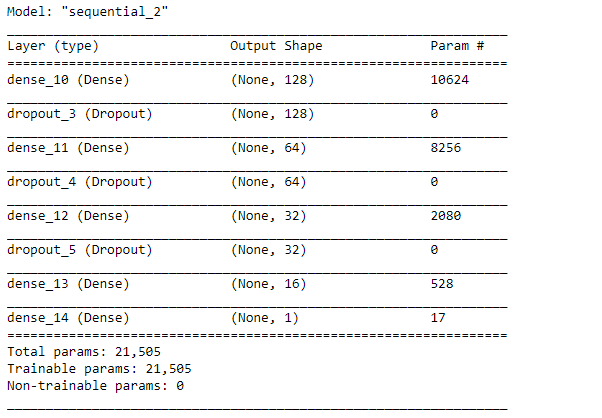
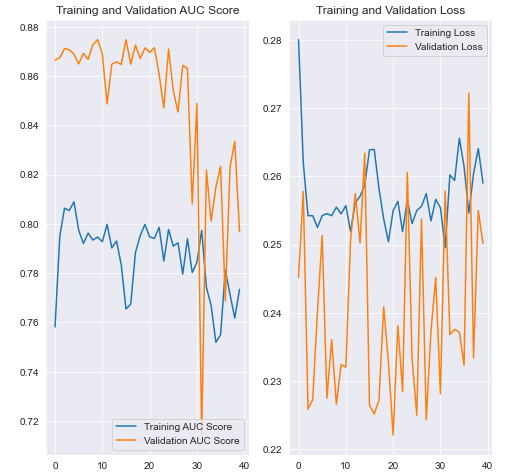
#### Conclusion from Model 2:
- Although the training and validation accuracy score is acceptable using dropouts but the model is not giving good results in case of validation loss which is fluctuating more as compared to previous model.
- The recall score is very poor in this case. Thus, the model will not be able to predict actual positive values using this model.

#### Try Dealing with Class Imbalance

## Model 3
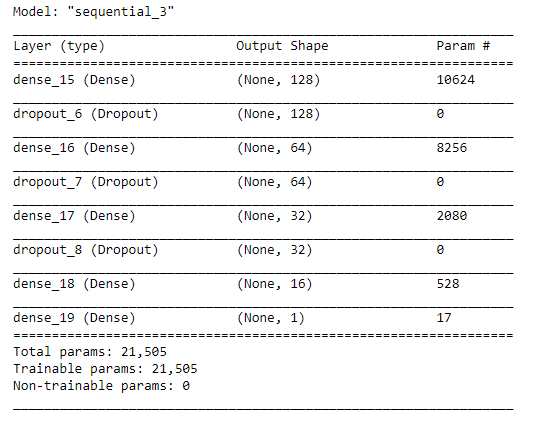
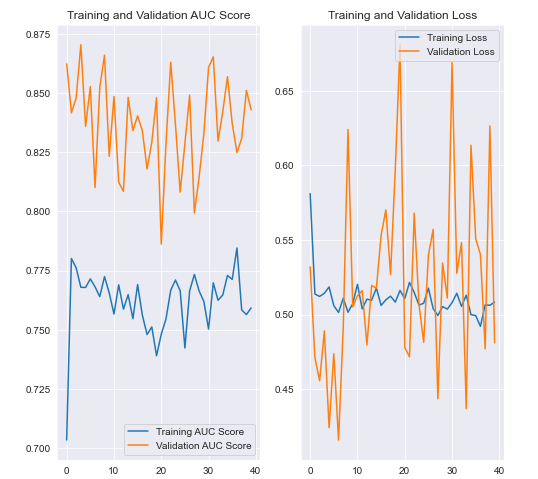
#### Conclusion from Model 3:
- The precision score has improved as compared to the previous models.
- The model seems more stable with acceptable AUC score. 
- Overfitting of the model can also be avoided when after dealing with class imbalance. 


## Model 4
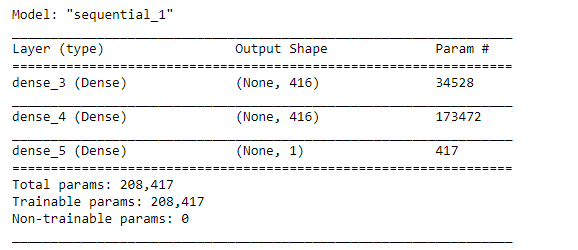
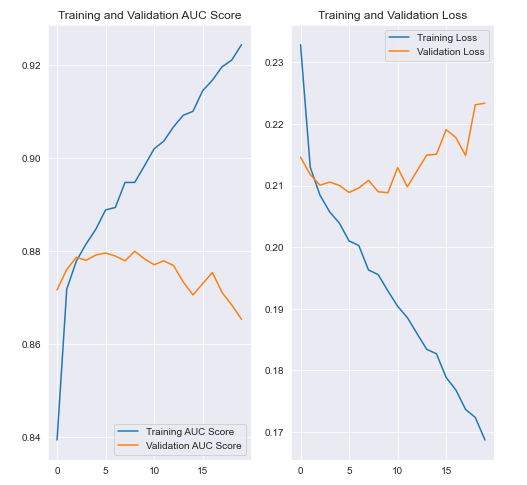
#### Conclusion from the Final Model:
- The validation loss has decreased significantly.
- The precision and recall metrics are improved to some extent.
- The model is more generalized
- learning rate and number of units used are not random but calculated using proper methods. 
